In [34]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import os
import re

In [12]:
file = open("Files/CR-shortanswer.csv")
reader_contents = pd.read_csv(file, header = 0)

Collect expert's comment, and ran cloud map

In [13]:
file_1 = open("Files/CR-expertshortanswer.csv" ,encoding= 'unicode_escape')
reader_contents_1 = pd.read_csv(file_1, header = 0)

In [18]:
expert_comment = reader_contents_1["StartDate"].dropna()[13:]

In [35]:
def word_cloud(lis):
    information_store = []
    
    for i in lis:
        information_store.append([i])
    text = ""
    
    for row in information_store:
        for word in row :
            text = text + " " + word

    punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''

    for ele in text:
        if ele in punc:
            text = text.replace(ele, "")


            
    return re.sub(r'(?:^| )\w(?:$| )', ' ', text).strip()

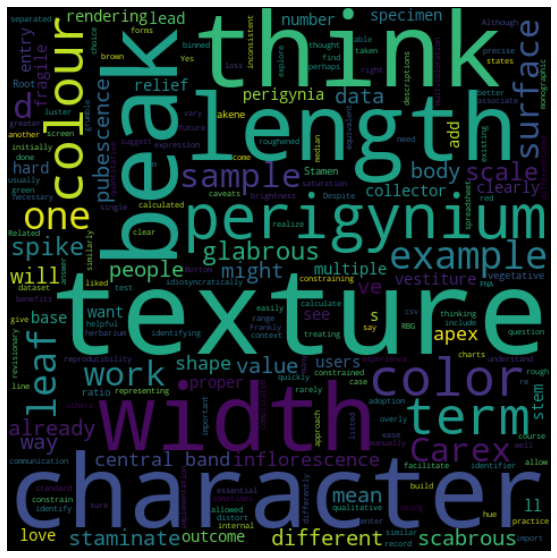

In [39]:
wordcloud_1 = WordCloud(width=480, height=480, background_color="black").generate(word_cloud(expert_comment))

plt.figure(figsize = [10,10])
plt.imshow(wordcloud_1, interpolation="bilinear")

plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

Collected issue reports from questionnaire Q3-Q8 (SE) and built word clouds. 

In [14]:
issues = reader_contents[["Q13", "Q4", "Q6", "Q7", "Q8"]]
issues = issues[2:]

Collected suggestions and built word clouds from Q9 (SE).

In [4]:
suggestions = reader_contents[["Q9"]]
suggestions = suggestions[2:]

Collected good features from the CR and built a word cloud from Q10 (SE).

In [5]:
good_features = reader_contents[["Q10"]]
good_features = good_features[2:]

In [16]:
def word_cloud(lis):
    information_store = []
    
    for i in lis:
        for q in lis[i]:
            if pd.isna(q) != True:
                information_store.append([q])
    text = ""
    
    for row in information_store:
        for word in row :
            text = text + " " + word
    
    return text

In [7]:
wordcloud_1 = WordCloud(width=480, height=480, background_color="pink").generate(word_cloud(issues))
wordcloud_2 = WordCloud(width=480, height=480, background_color="green").generate(word_cloud(suggestions))
wordcloud_3 = WordCloud(width=480, height=480, background_color="black").generate(word_cloud(good_features))

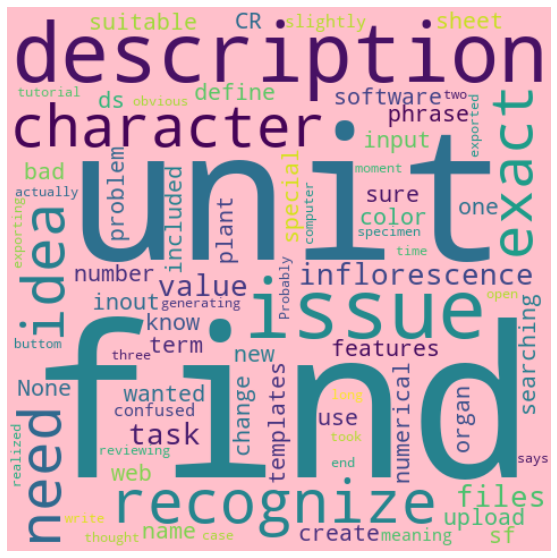

In [8]:
plt.figure(figsize = [10,10])
plt.imshow(wordcloud_1, interpolation="bilinear")

plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [9]:
plt.savefig(os.path.join('Pics/Word Cloud/wc1.png'), dpi=300, format='png', bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

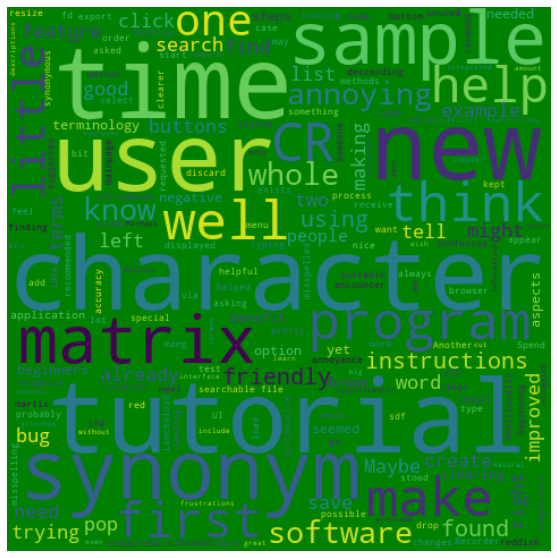

In [10]:
plt.figure(figsize = [10,10])
plt.imshow(wordcloud_2, interpolation="bilinear")

plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [11]:
plt.savefig(os.path.join('Pics/Word Cloud/wc2.png'), dpi=300, format='png', bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

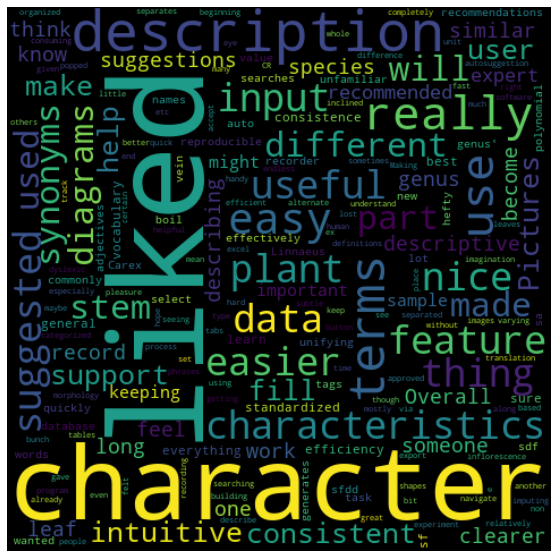

In [12]:
plt.figure(figsize = [10,10])
plt.imshow(wordcloud_3, interpolation="bilinear")

plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [13]:
plt.savefig(os.path.join('Pics/Word Cloud/wc3.png'), dpi=300, format='png', bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

Words will be used in the research.

In [14]:
# Count excel words
def excel_word_detach():
    # read excel files and fill NA values as "of", trans interger to string
    folder = os.listdir("Experiment Files")
    folder.remove('.DS_Store')
    d={}

    for i in folder:
        test = pd.read_excel("Experiment Files/" + i + "/" + i + ".xlsx").fillna("of").astype(str)
        # remove stopwords (e.g., of, the, or) and create empty list to store values
        remove = ["of", "the", "or"]
        store = []

        # store non-na value into store
        for i in test:
            for p in test[i]:
                if p not in remove:
                    store.append(p.split())

        # store non-stopwords value into word_count
        word_count = []
        for q in store:
            for c in q:
                if c not in remove:
                    word_count.append(c)

        # store and count value, store those value and words into dictionary d
        for x in word_count:
            if not x in d:
                d[x]=1
            else:
                d[x]=d[x]+1
    return d

In [15]:
orders = excel_word_detach()
last_sort_orders_excel = {}

sort_orders = sorted(orders.items(), key=lambda x: x[1], reverse=False)

punctuations = ";:.,"
key_list = ()
store = []

for i in sort_orders:
    key_list = i[0]

    for p in punctuations:
	    key_list = key_list.replace(p, "")    
    
    last_sort_orders_excel[key_list] = i[1]

# remove punctuation from orders and save those value into dictionary
last_sort_orders = sorted(last_sort_orders_excel.items(), key=lambda x: x[1], reverse=False)
last_orders = {}

# last_sort_orders will be the output dictionary for future useage
for i in last_sort_orders:
	last_orders[i[0].replace(";", "")] = i[1]

In [16]:
# Store words as dictionary, and set key as lower key.
alphabet = dict()
# alphabet =  {k.lower(): v for k, v in last_orders.items()}

for p, q in last_orders.items():
    if p.lower() in alphabet:
       alphabet[p.lower()] = alphabet[p.lower()] + q
    else:
       alphabet[p.lower()] = q

In [17]:
alphabet

{'lancehead-shaped': 5,
 'gutter': 5,
 'lanceoloid': 8,
 'u-shaped': 6,
 '…': 1,
 'stem': 15,
 'leaf': 2,
 'inflorescence': 10,
 'unit': 3,
 'mean=700': 1,
 'range=(40-)': 1,
 '55-80(-100)': 1,
 'mean=75': 1,
 'range=(5-)': 1,
 '625-875(-10)': 1,
 'description': 1,
 '(40-)55-85(-100)': 1,
 'long': 1,
 '(5-)625-875(-10)': 1,
 'prominence': 5,
 'reddish-brown': 1,
 'vegitative': 1,
 'clums': 1,
 'stems': 1,
 'not': 1,
 'applicable': 1,
 'maroon': 8,
 'brown-red': 10,
 'visability': 1,
 'colour': 3,
 'lanceiloid': 1,
 'colum': 1,
 'maroom': 1,
 'u': 12,
 'count': 5,
 'spikes': 18,
 'vegetative': 6,
 'inflorescene': 1,
 'conspicuous': 11,
 'charater': 1,
 'conspicous': 1,
 '40cm': 2,
 'conspicious': 2,
 '100cm': 2,
 'carex': 2,
 'muskingumensis': 2,
 'coloration': 6,
 '(cm)': 2,
 '_': 2,
 'range-percentile': 2,
 'character': 16,
 'sample': 33,
 'summits': 18,
 'units': 5,
 'sumits': 2,
 'color': 8,
 'summrary': 3,
 'sheath': 26,
 'red-brown': 3,
 'visibility': 10,
 'reddish': 4,
 'number':

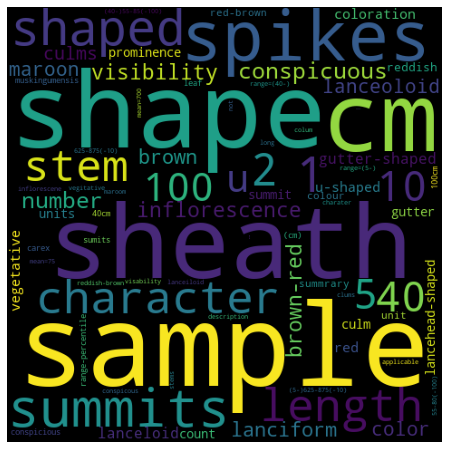

In [18]:
wordcloud_Excel = WordCloud(width=480, height=480).generate_from_frequencies(alphabet)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud_Excel)
plt.axis("off")
plt.margins(x=0, y=0)

plt.savefig(os.path.join('Pics/Word Cloud/Excel_wordcloud.png'), dpi=300, format='png', bbox_inches='tight')
plt.show()

In [19]:
# Count cr words
def cr_word_detach():
    # read cr files and fill NA values as "of", trans interger to string
    folder = os.listdir("Experiment Files")
    folder.remove('.DS_Store')
    d={}

    for i in folder:
        test = pd.read_csv("Experiment Files/" + i + "/Carex muskingumensis/Carex muskingumensis.csv").astype(str)
        test = test.drop(columns=['Summary'])
        # remove stopwords (e.g., of, the, or) and create empty list to store values
        remove = ["of", "the", "or"]
        store = []

        # store non-na value into store
        for i in test:
            for p in test[i]:
                if p not in remove:
                    store.append(p.split())

        # store non-stopwords value into word_count
        word_count = []
        for q in store:
            for c in q:
                if c not in remove:
                    word_count.append(c)

        # store and count value, store those value and words into dictionary d
        for x in word_count:
            if not x in d:
                d[x]=1
            else:
                d[x]=d[x]+1
    return d

In [20]:
orders = cr_word_detach()
last_sort_orders = {}

# remove punctuation from orders and save those value into dictionary
sort_orders = sorted(orders.items(), key=lambda x: x[1], reverse=False)

# last_sort_orders will be the output dictionary for future useage
for i in sort_orders:
	last_sort_orders[i[0].replace(";", "")] = i[1]

In [21]:
# Store words as dictionary, and set key as lower key.
alphabet_1 = dict()
# alphabet_1 =  {k.lower(): v for k, v in last_sort_orders.items()}

for p, q in last_sort_orders.items():
    if p.lower() in alphabet_1:
       alphabet_1[p.lower()] = alphabet_1[p.lower()] + q
    else:
       alphabet_1[p.lower()] = q

In [22]:
alphabet_1

{'1000': 1,
 '400': 1,
 'lancoloid': 2,
 'prominence': 3,
 'vegetative': 3,
 'lancehead-shaped': 6,
 'conspicuous': 7,
 'conspicious': 8,
 'gutter-shape': 10,
 'visibility': 12,
 '100': 14,
 '10': 14,
 'number': 15,
 'units': 15,
 'unit': 15,
 '40': 15,
 '5': 15,
 'length': 16,
 'color': 16,
 'nan': 20,
 'u': 20,
 'shaped': 20,
 'lanceoloid': 22,
 'summit': 29,
 'shape': 30,
 'inflorescence': 30,
 'stem': 31,
 'sheath': 31,
 'red': 31,
 'brown': 31}

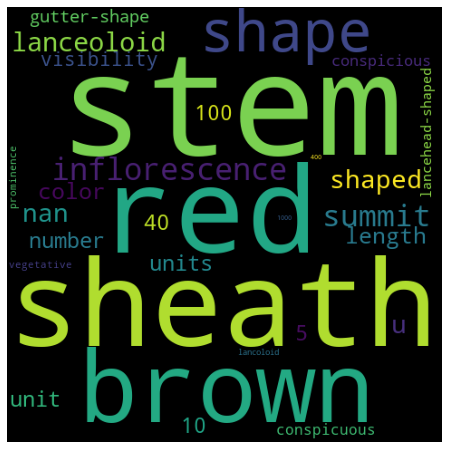

In [23]:
wordcloud_CR = WordCloud(width=480, height=480).generate_from_frequencies(alphabet_1)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud_CR)
plt.axis("off")
plt.margins(x=0, y=0)
plt.savefig(os.path.join('Pics/Word Cloud/CR_wordcloud.png'), dpi=300, format='png', bbox_inches='tight')
plt.show()

In [24]:
# read cr files and fill NA values as "of", trans interger to string
# get who made mistake and how many times they made. 
folder = os.listdir("Experiment Files")
folder.remove('.DS_Store')
d={}

# check the wrong term
check = ["gutter-shape;"]

wrong = {}

for i in folder:
    test = pd.read_csv("Experiment Files/" + i + "/Carex muskingumensis/Carex muskingumensis.csv").astype(str)
    test = test.drop(columns=['Summary'])
    wrong[i] = 0
    store = []
    
    # store non-na value into store
    for q in test:
        for p in test[q]:
            store.append(p.split())
    
    flatList = [item for elem in store for item in elem]

    for a in check:
        if a in flatList:
            wrong[i] = wrong[i] + 1

print(wrong)

{'s111': 0, 's118': 1, 's127': 1, 's121': 1, 's211': 0, 's229': 1, 's221': 0, 's217': 1, 's228': 1, 's115': 1, 's112': 0, 's122': 0, 's113': 1, 's212': 1, 's213': 0, 's214': 1}


In [25]:
for i in wrong:
    if wrong[i] != 0:
        print(i)

s118
s127
s121
s229
s217
s228
s115
s113
s212
s214
